In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# Get the directory where this notebook is located
notebook_dir = os.path.dirname(os.path.abspath(''))

# Add the PythonPrep directory to the path
pythonprep_dir = os.path.join(os.path.dirname(notebook_dir), 'PythonPrep') if 'PythonPrep' not in notebook_dir else notebook_dir
sys.path.append(pythonprep_dir)

from paths import main_path

In [ ]:
path_input = main_path + '/Democracy/Democracy_Main/MainAnalysis/input'

## Main Mechanisms

### School

In [60]:
### Primary
file_path = f"{path_input}/channels21st/school2.csv"
df = pd.read_csv(file_path, encoding='UTF-8')
df.rename(columns={
    'Country Name': 'country',
    'Country Code': 'iso3c',
    'Series Name': 'series_name',
    'Series Code': 'series_code'
}, inplace=True)

df = df[df['series_code'] == "SE.PRM.NENR"].reset_index()
columns_to_keep = ["country", "iso3c", "series_name", "series_code"] + [
    f"{year} [YR{year}]" for year in range(2001, 2020)
]
df = df.loc[:, df.columns.intersection(columns_to_keep)]
df.replace("..", np.nan, inplace=True)
#df = df.dropna()
#df.head()
numeric_data = df.loc[:, "2001 [YR2001]":"2019 [YR2019]"].apply(pd.to_numeric)
growth_rates = numeric_data.pct_change(axis=1) * 100
avg_growth_rate = growth_rates.mean(axis=1, skipna=True)
df["primary_school1"] = avg_growth_rate
df = df[['country', 'primary_school1']].dropna()
df

/var/folders/qx/x8vtl7yn3_71qbvkk4v8yhym0000gn/T/ipykernel_56714/3074628849.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = numeric_data.pct_change(axis=1) * 100


,country,primary_school1
1,Albania,0.054563
2,Algeria,0.377842
5,Angola,0.319468
6,Antigua and Barbuda,-0.135527
7,Argentina,0.010368
...,...,...
259,Sub-Saharan Africa,1.109368
260,Sub-Saharan Africa (excluding high income),1.109466
261,Sub-Saharan Africa (IDA & IBRD countries),1.109368
262,Upper middle income,0.035146


In [61]:
df[df['primary_school1']==np.inf]

,country,primary_school1


In [62]:
name_mapping = {
    'Bahamas, The': 'Bahamas',
    'Brunei Darussalam': 'Brunei',
    'Cabo Verde': 'Cape Verde',
    'Congo, Rep.': 'Congo',
    "Cote d'Ivoire": "Cote d'Ivoire",
    'Czech Republic': 'Czechia',
    'Egypt, Arab Rep.': 'Egypt',
    'Gambia, The': 'Gambia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Dem. People's Rep.": 'North Korea',
    'Korea, Rep.': 'South Korea',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Macao SAR, China': 'Macao',
    'Micronesia, Fed. Sts.': 'Micronesia (country)',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Republic': 'Syria',
    'Timor-Leste': 'East Timor',
    'Venezuela, RB': 'Venezuela',
    'West Bank and Gaza': 'Palestine',
    'Yemen, Rep.': 'Yemen'
}
df['country'] = df['country'].replace(name_mapping)

In [63]:
df.to_csv(path_input + '/newchannel/primary.csv')

In [64]:
### Secondary
file_path = f"{path_input}/channels21st/school2.csv"
df = pd.read_csv(file_path, encoding='UTF-8')
df.rename(columns={
    'Country Name': 'country',
    'Country Code': 'iso3c',
    'Series Name': 'series_name',
    'Series Code': 'series_code'
}, inplace=True)

df = df[df['series_code'] == "SE.SEC.NENR"].reset_index()
columns_to_keep = ["country", "iso3c", "series_name", "series_code"] + [
    f"{year} [YR{year}]" for year in range(2001, 2020)
]
df = df.loc[:, df.columns.intersection(columns_to_keep)]
df.replace("..", pd.NA, inplace=True)
numeric_data = df.loc[:, "2001 [YR2001]":"2019 [YR2019]"].apply(pd.to_numeric)
growth_rates = numeric_data.pct_change(axis=1) * 100
avg_growth_rate = growth_rates.mean(axis=1, skipna=True)
df["secondary_school1"] = avg_growth_rate
df = df[['country', 'secondary_school1']].dropna()
df

/var/folders/qx/x8vtl7yn3_71qbvkk4v8yhym0000gn/T/ipykernel_56714/2688176481.py:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = numeric_data.pct_change(axis=1) * 100


,country,secondary_school1
0,Afghanistan,6.857807
1,Albania,1.444134
5,Angola,2.040645
6,Antigua and Barbuda,-0.348244
7,Argentina,0.784887
...,...,...
259,Sub-Saharan Africa,2.843739
260,Sub-Saharan Africa (excluding high income),2.844867
261,Sub-Saharan Africa (IDA & IBRD countries),2.843739
262,Upper middle income,0.889168


In [65]:
df[df['secondary_school1']==np.inf]

,country,secondary_school1


In [66]:
name_mapping = {    
    'Bahamas, The': 'Bahamas',
    'Brunei Darussalam': 'Brunei',
    'Cabo Verde': 'Cape Verde',
    'Congo, Rep.': 'Congo',
    "Cote d'Ivoire": "Cote d'Ivoire",
    'Czech Republic': 'Czechia',
    'Egypt, Arab Rep.': 'Egypt',
    'Gambia, The': 'Gambia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Rep.": 'South Korea',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Macao SAR, China': 'Macao',
    'Micronesia, Fed. Sts.': 'Micronesia (country)',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Republic': 'Syria',
    'Timor-Leste': 'East Timor',
    'Venezuela, RB': 'Venezuela',
    'West Bank and Gaza': 'Palestine',
    'Yemen, Rep.': 'Yemen'
}
df['country'] = df['country'].replace(name_mapping)

In [67]:
df.to_csv(path_input + '/newchannel/secondary.csv')

### Mortality (1k People)

In [68]:
file_path = f"{path_input}/channels21st/wdi.csv"
df = pd.read_csv(file_path, encoding='UTF-8')
df.rename(columns={
    'Country Name': 'country',
    'Country Code': 'iso3c',
    'Series Name': 'series_name',
    'Series Code': 'series_code'
}, inplace=True)
df = df[df['series_code'] == "SP.DYN.IMRT.IN"].reset_index()
columns_to_keep = ["country", "iso3c", "series_name", "series_code"] + [
    f"{year} [YR{year}]" for year in range(2001, 2020)
]
df = df.loc[:, df.columns.intersection(columns_to_keep)]
df.replace("..", pd.NA, inplace=True)
numeric_data = df.loc[:, "2001 [YR2001]":"2019 [YR2019]"].apply(pd.to_numeric)
growth_rates = numeric_data.pct_change(axis=1) * 100
avg_growth_rate = growth_rates.mean(axis=1, skipna=True)
df["mortality_rate1"] = avg_growth_rate
df = df[['country', 'mortality_rate1']].dropna()
df

/var/folders/qx/x8vtl7yn3_71qbvkk4v8yhym0000gn/T/ipykernel_56714/1162930969.py:16: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = numeric_data.pct_change(axis=1) * 100


,country,mortality_rate1
0,Afghanistan,-3.457025
1,Albania,-5.241319
2,Algeria,-2.770003
4,Andorra,-4.397261
5,Angola,-4.627791
...,...,...
259,Sub-Saharan Africa,-2.929137
260,Sub-Saharan Africa (excluding high income),-2.929679
261,Sub-Saharan Africa (IDA & IBRD countries),-2.927773
262,Upper middle income,-4.988836


In [69]:
df[df['mortality_rate1']==np.inf]

,country,mortality_rate1


In [70]:
name_mapping = {
    'Bahamas, The': 'Bahamas',
    'Brunei Darussalam': 'Brunei',
    'Cabo Verde': 'Cape Verde',
    'Congo, Rep.': 'Congo',
    "Cote d'Ivoire": "Cote d'Ivoire",
    'Czech Republic': 'Czechia',
    'Egypt, Arab Rep.': 'Egypt',
    'Gambia, The': 'Gambia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Dem. People's Rep.": 'North Korea',
    'Korea, Rep.': 'South Korea',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Macao SAR, China': 'Macao',
    'Micronesia, Fed. Sts.': 'Micronesia (country)',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Republic': 'Syria',
    'Timor-Leste': 'East Timor',
    'Venezuela, RB': 'Venezuela',
    'West Bank and Gaza': 'Palestine',
    'Yemen, Rep.': 'Yemen'
}
df['country'] = df['country'].replace(name_mapping)

In [71]:
df.to_csv(path_input + '/newchannel/mortality.csv')

In [72]:
### We already had child mortality in the previous version of additional outcomes and dropped it

### Trade (% of GDP)

In [73]:
# file_path = f"{path_input}/channels21st/wdi.csv"
# df = pd.read_csv(file_path, encoding='UTF-8')
# df.rename(columns={
#     'Country Name': 'country_name',
#     'Country Code': 'iso3c',
#     'Series Name': 'series_name',
#     'Series Code': 'series_code'
# }, inplace=True)
# df = df[df['series_code'] == "NE.TRD.GNFS.ZS"].reset_index()
# columns_to_keep = ["country_name", "iso3c", "series_name"] + [
#     f"{year} [YR{year}]" for year in range(2001, 2020)
# ]
# df = df.loc[:, df.columns.intersection(columns_to_keep)]
# df.replace("..", pd.NA, inplace=True)
# df = df.dropna()
# df
# for col in df.columns[3:]:  
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# year_columns = [col for col in df.columns if "YR" in col]
# df['trade'] = df[year_columns].mean(axis=1)
# df = df[['country_name', 'iso3c', 'trade']]
# df

In [74]:
### Ok to keep, but it's not in the table. Also we already have imports/exports

### Conflict

In [75]:
# file_path = f"{path_input}/channels21st/2020 Edition CNTSDATA files with LINKS/2020 Edition CNTSDATA.xlsx"
# data = pd.read_excel(file_path, sheet_name="2019 Data", usecols="A:GM", skiprows=0, nrows=17720)
# data = data[data["Country Code"] != "code"]
# data = data[["Country", "Year", "Weighted Conflict Index"]]
# data["Year"] = pd.to_numeric(data["Year"], errors="coerce")
# data.to_csv('conflicts.csv', index=False)

In [76]:
# df = pd.read_csv('conflicts.csv')
# df = df[(df['Year'] >= 2001) & (df['Year'] <= 2019)]
# valid_countries = df[df['Year'] == 2001].groupby('Country').filter(lambda x: x['Year'].min() == 2001)
# df = df[df['Country'].isin(valid_countries['Country'].unique())]
# df['growth_rate'] = df.groupby('Country')['Weighted Conflict Index'].pct_change() * 100

In [77]:
# periods = {
#     '2001-2019': (2001, 2019)
# }

# result_df = pd.DataFrame()

# for period, (start_year, end_year) in periods.items():

#     period_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
#     ind = period_df.groupby('Country')['growth_rate'].mean().rename(period)
    
#     result_df = pd.concat([result_df, ind], axis=1)

# result_df.reset_index(inplace=True)
# result_df['country'] = result_df['index']
# result_df = result_df.drop('index', axis=1)
# result_df = result_df[['country'] + [col for col in result_df.columns if col != 'country']]

# result_df.rename(columns={
#     '2001-2019': 'conflict',
# }, inplace=True)

# result_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# result_df = result_df.dropna()
# result_df

In [78]:
### Not enough values, as it is an index we risk having the value 0 and so a division by 0
### Maybe keep standardized value

### R&D Expenditure

In [113]:
file_path = f"{path_input}/channels21st/raw_data.csv"
df = pd.read_csv(file_path)
df = df[df['Indicator']=='Research and development expenditure (% of GDP)'].reset_index()
df = df.drop(['index', 'Subindicator Type'], axis=1)
df.columns = df.columns.str.strip()
metadata_columns = ["Country ISO3", "Country Name", "Indicator Id", "Indicator"]
year_columns = [col for col in df.columns if col.isdigit() and 2001 <= int(col) <= 2019]
df = df[metadata_columns + year_columns]
# df = df.dropna()
# df
numeric_data = df.loc[:, "2001":"2019"].apply(pd.to_numeric)
growth_rates = numeric_data.pct_change(axis=1) * 100
avg_growth_rate = growth_rates.mean(axis=1, skipna=True)
df["rd_expenditure_g"] = avg_growth_rate
df = df[['Country Name', 'rd_expenditure_g']].dropna()
df = df.rename(columns={'Country Name': 'country'})
df

/var/folders/qx/x8vtl7yn3_71qbvkk4v8yhym0000gn/T/ipykernel_56714/3865218795.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = numeric_data.pct_change(axis=1) * 100


,country,rd_expenditure_g
0,Angola,0.000000
1,Albania,6.333029
2,United Arab Emirates,14.323889
3,Argentina,1.631875
4,Armenia,-1.260196
...,...,...
144,"Venezuela, RB",1.969694
145,Virgin Islands (U.S.),-4.311080
146,Vietnam,7.792321
147,South Africa,0.944810


In [114]:
df[df['rd_expenditure_g']==np.inf]

,country,rd_expenditure_g


In [115]:
name_mapping = {
    'Brunei Darussalam': 'Brunei',
    "Cote d'Ivoire": "Cote d'Ivoire",
    'Congo, Dem. Rep.': 'Democratic Republic of Congo',
    'Czech Republic': 'Czechia',
    'Egypt, Arab Rep.': 'Egypt',
    'Gambia, The': 'Gambia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Rep.": 'South Korea',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Macao SAR, China': 'Macao',
    'Macedonia, FYR': 'North Macedonia',
    'Micronesia, Fed. Sts.': 'Micronesia (country)',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Republic': 'Syria',
    'Venezuela, RB': 'Venezuela',
    'West Bank and Gaza': 'Palestine',
    'Virgin Islands (U.S.)': 'United States Virgin Islands'
}
df['country'] = df['country'].replace(name_mapping)

In [116]:
df.to_csv(path_input + '/newchannel/rd_expenditure.csv')

In [83]:
# No observations

### R&D Research (per 1M)

In [84]:
file_path = f"{path_input}/channels21st/raw_data.csv"
df = pd.read_csv(file_path)
df = df[df['Indicator']=='Researchers in R&D (per million people)'].reset_index()
df = df.drop(['index', 'Subindicator Type'], axis=1)
df.columns = df.columns.str.strip()
metadata_columns = ["Country ISO3", "Country Name", "Indicator Id", "Indicator"]
year_columns = [col for col in df.columns if col.isdigit() and 2001 <= int(col) <= 2019]
df = df[metadata_columns + year_columns]
# df = df.dropna()
# df
growth_rates = numeric_data.pct_change(axis=1) * 100
avg_growth_rate = growth_rates.mean(axis=1, skipna=True)
df["rd_research1"] = avg_growth_rate
df = df[['Country Name', 'rd_research1']].dropna()
df = df.rename(columns={'Country Name': 'country'})
df

/var/folders/qx/x8vtl7yn3_71qbvkk4v8yhym0000gn/T/ipykernel_56714/2848665227.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = numeric_data.pct_change(axis=1) * 100


,country,rd_research1
0,Angola,0.000000
1,Albania,6.333029
2,United Arab Emirates,14.323889
3,Argentina,1.631875
4,American Samoa,-1.260196
...,...,...
131,"Venezuela, RB",1.609442
132,Vietnam,9.147333
133,South Africa,2.090092
134,Zambia,3.232796


In [85]:
df[df['rd_research1']==np.inf]

,country,rd_research1


In [86]:
name_mapping = {
    'Brunei Darussalam': 'Brunei',
    "Cote d'Ivoire": "Cote d'Ivoire",
    'Congo, Dem. Rep.': 'Democratic Republic of Congo',
    'Congo, Rep.': 'Congo',
    'Czech Republic': 'Czechia',
    'Egypt, Arab Rep.': 'Egypt',
    'Gambia, The': 'Gambia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Rep.": 'South Korea',
    'Lao PDR': 'Laos',
    'Macao SAR, China': 'Macao',
    'Macedonia, FYR': 'North Macedonia',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Republic': 'Syria',
    'Venezuela, RB': 'Venezuela',
    'West Bank and Gaza': 'Palestine'
}
df['country'] = df['country'].replace(name_mapping)

In [87]:
df.to_csv(path_input + '/newchannel/rd_research.csv')

In [88]:
# No observations

### New Business Registration

In [89]:
file_path = f"{path_input}/channels21st/raw_data.csv"
df = pd.read_csv(file_path)
df = df[df['Indicator']=='New business density (new registrations per 1,000 people ages 15-64)'].reset_index()
df = df.drop(['index', 'Subindicator Type'], axis=1)
df.columns = df.columns.str.strip()
metadata_columns = ["Country ISO3", "Country Name", "Indicator Id", "Indicator"]
year_columns = [col for col in df.columns if col.isdigit() and 2001 <= int(col) <= 2019]
df = df[metadata_columns + year_columns]
# df = df.dropna()
growth_rates = numeric_data.pct_change(axis=1) * 100
avg_growth_rate = growth_rates.mean(axis=1, skipna=True)
df["new_business1"] = avg_growth_rate
df = df[['Country Name', 'new_business1']].dropna()
df = df.rename(columns={'Country Name': 'country'})
df

/var/folders/qx/x8vtl7yn3_71qbvkk4v8yhym0000gn/T/ipykernel_56714/1499016605.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = numeric_data.pct_change(axis=1) * 100


,country,new_business1
0,Afghanistan,0.000000
1,Albania,6.333029
2,United Arab Emirates,14.323889
3,Argentina,1.631875
4,Armenia,-1.260196
...,...,...
144,Uganda,1.969694
145,Ukraine,-4.311080
146,Uruguay,7.792321
147,Uzbekistan,0.944810


In [90]:
name_mapping = {
    'Brunei Darussalam': 'Brunei',
    "Cote d'Ivoire": "Cote d'Ivoire",
    'Congo, Dem. Rep.': 'Democratic Republic of Congo',
    'Cabo Verde': 'Cape Verde',
    'Czech Republic': 'Czechia',
    'Micronesia, Fed. Sts.': 'Micronesia (country)',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Macedonia, FYR': 'North Macedonia',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Republic': 'Syria',
    'Timor-Leste': 'East Timor',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Isle of Man': 'Isle of Man',
    'El Salvador': 'El Salvador',
}
df['country'] = df['country'].replace(name_mapping)

In [91]:
df[df['new_business1']==np.inf]

,country,new_business1


In [92]:
df.to_csv(path_input + '/newchannel/new_business.csv')

## China 

### Import

In [93]:
file_path = f"{path_input}/channels21st/comtrade.csv"
df = pd.read_csv(file_path)
df.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

In [94]:
df1 = df[['Trade Flow', 'Year', 'Period', 'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO', 'Trade Value (US$)']]

df1 = df1[df1['Trade Flow']=='Import']
df1 = df1[['Trade Flow', 'Year', 'Period', 'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO', 'Trade Value (US$)']]
df2 = df1.sort_values(by=["Reporter", "Year"])
df2 = df2[['Year', 'Reporter', 'Trade Value (US$)']]
filtered_df = df2[(df2["Year"] >= 2001) & (df2["Year"] <= 2019)]

# countries_with_2001_start = filtered_df.groupby("Reporter")["Year"].min()
# valid_countries = countries_with_2001_start[countries_with_2001_start == 2001].index
# filtered_valid_df = filtered_df[filtered_df["Reporter"].isin(valid_countries)]
# required_years = set(range(2001, 2020))

# countries_with_continuous_data = []
# for reporter, group in filtered_valid_df.groupby("Reporter"):
#     observed_years = set(group["Year"])
#     if observed_years == required_years:  
#         countries_with_continuous_data.append(reporter)

# countries_with_continuous_data_count = len(countries_with_continuous_data)
# countries_df = filtered_valid_df[filtered_valid_df["Reporter"].isin(countries_with_continuous_data)].reset_index()
# df = countries_df.drop('index', axis=1)
df2['growth_rate'] = df2.groupby('Reporter')['Trade Value (US$)'].pct_change() * 100
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

periods = {
    '2001-2019': (2001, 2019)
}

result_df = pd.DataFrame()

for period, (start_year, end_year) in periods.items():

    period_df = df2[(df2['Year'] >= start_year) & (df2['Year'] <= end_year)]
    ind = period_df.groupby('Reporter')['growth_rate'].mean().rename(period)
    
    result_df = pd.concat([result_df, ind], axis=1)

result_df.reset_index(inplace=True)
result_df['country'] = result_df['index']
result_df = result_df.drop('index', axis=1)
result_df = result_df[['country'] + [col for col in result_df.columns if col != 'country']]

result_df.rename(columns={
    '2001-2019': 'china_import1',
}, inplace=True)

result_df.replace([np.inf, -np.inf], np.nan, inplace=True)
result_df = result_df.dropna()
result_df

,country,china_import1
0,Afghanistan,68.028670
1,Albania,24.306116
2,Algeria,26.916219
3,Andorra,12.179763
4,Angola,20.532698
...,...,...
194,Viet Nam,24.298292
195,Wallis and Futuna Isds,65.930914
196,Yemen,18.487488
197,Zambia,43.848550


In [95]:
result_df.describe()

,china_import1
count,196.000000
mean,84.609756
std,573.638211
min,-59.874955
25%,16.829969
50%,23.064109
75%,34.293508
max,7967.647033


In [96]:
df = result_df.copy()

Q1 = df['china_import1'].quantile(0.25)
Q3 = df['china_import1'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['china_import1'] >= lower_bound) & (df['china_import1'] <= upper_bound)]

In [97]:
df_cleaned.describe()

,china_import1
count,171.000000
mean,23.299699
std,9.847252
min,6.085590
25%,15.773512
50%,21.591343
75%,29.017530
max,56.687023


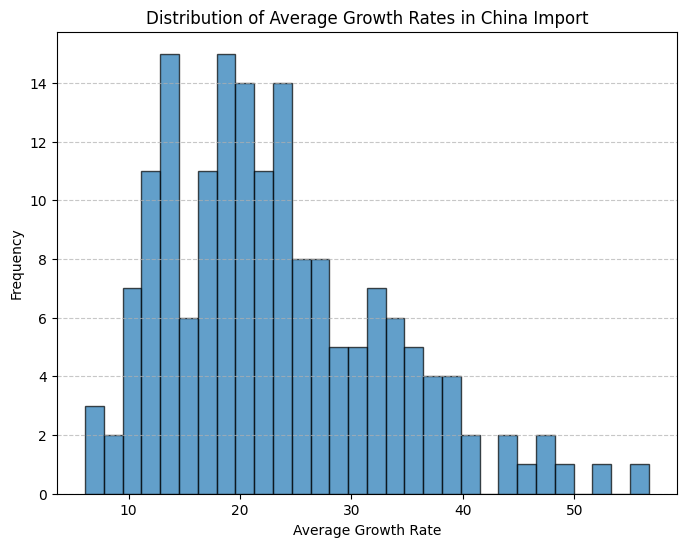

In [98]:
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['china_import1'], bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribution of Average Growth Rates in China Import")
plt.xlabel("Average Growth Rate")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [99]:
name_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia Herzegovina': 'Bosnia and Herzegovina',
    'Brunei Darussalam': 'Brunei',
    'Cabo Verde': 'Cape Verde',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Dem. Rep. of the Congo': 'Democratic Republic of Congo',
    'Dominican Rep.': 'Dominican Republic',
    'FS Micronesia': 'Micronesia (country)',
    'Faeroe Isds': 'Faroe Islands',
    'China, Hong Kong SAR': 'Hong Kong',
    'China, Macao SAR': 'Macao',
    "Lao People's Dem. Rep.": 'Laos',
    'Rep. of Korea': 'South Korea',
    'Rep. of Moldova': 'Moldova',
    'State of Palestine': 'Palestine',
    'United Rep. of Tanzania': 'Tanzania',
    'USA': 'United States',
    'Viet Nam': 'Vietnam',
    'Solomon Isds': 'Solomon Islands',
    'Other Asia, nes': 'Other Asia, not elsewhere specified'
}
df_cleaned['country'] = df_cleaned['country'].replace(name_mapping)

/var/folders/qx/x8vtl7yn3_71qbvkk4v8yhym0000gn/T/ipykernel_56714/1681741659.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['country'] = df_cleaned['country'].replace(name_mapping)


In [100]:
df_cleaned.to_csv(path_input + '/newchannel/china_import.csv')

### Export

In [101]:
file_path = f"{path_input}/channels21st/comtrade.csv"
df = pd.read_csv(file_path)
df.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

In [102]:
df1 = df[['Trade Flow', 'Year', 'Period', 'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO', 'Trade Value (US$)']]

df1 = df1[df1['Trade Flow']=='Export']
df1 = df1[['Trade Flow', 'Year', 'Period', 'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO', 'Trade Value (US$)']]
df2 = df1.sort_values(by=["Reporter", "Year"])
df2 = df2[['Year', 'Reporter', 'Trade Value (US$)']]
filtered_df = df2[(df2["Year"] >= 2001) & (df2["Year"] <= 2019)]

# countries_with_2001_start = filtered_df.groupby("Reporter")["Year"].min()
# valid_countries = countries_with_2001_start[countries_with_2001_start == 2001].index
# filtered_valid_df = filtered_df[filtered_df["Reporter"].isin(valid_countries)]
# required_years = set(range(2001, 2020))

# countries_with_continuous_data = []
# for reporter, group in filtered_valid_df.groupby("Reporter"):
#     observed_years = set(group["Year"])
#     if observed_years == required_years:  
#         countries_with_continuous_data.append(reporter)

# countries_with_continuous_data_count = len(countries_with_continuous_data)
# countries_df = filtered_valid_df[filtered_valid_df["Reporter"].isin(countries_with_continuous_data)].reset_index()
# df = countries_df.drop('index', axis=1)

df2['growth_rate'] = df2.groupby('Reporter')['Trade Value (US$)'].pct_change() * 100
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2 = df2.dropna()

periods = {
    '2001-2019': (2001, 2019)
}

result_df = pd.DataFrame()

for period, (start_year, end_year) in periods.items():

    period_df = df2[(df2['Year'] >= start_year) & (df2['Year'] <= end_year)]
    ind = period_df.groupby('Reporter')['growth_rate'].mean().rename(period)
    
    result_df = pd.concat([result_df, ind], axis=1)

result_df.reset_index(inplace=True)
result_df['country'] = result_df['index']
result_df = result_df.drop('index', axis=1)
result_df = result_df[['country'] + [col for col in result_df.columns if col != 'country']]

result_df.rename(columns={
    '2001-2019': 'china_export1',
}, inplace=True)

result_df.replace([np.inf, -np.inf], np.nan, inplace=True)
result_df = result_df.dropna()
result_df

,country,china_export1
0,Afghanistan,96.057944
1,Albania,1419.332422
2,Algeria,517.693962
3,Andorra,1093.521612
4,Angola,10.047540
...,...,...
183,Venezuela,82.895459
184,Viet Nam,20.400229
185,Yemen,35.021007
186,Zambia,127.122600


In [103]:
result_df.describe()

,china_export1
count,188.000000
mean,1930.556581
std,9602.638842
min,-43.145070
25%,22.068976
50%,51.538832
75%,231.200233
max,106231.373239


In [104]:
df = result_df.copy()

Q1 = df['china_export1'].quantile(0.25)
Q3 = df['china_export1'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['china_export1'] >= lower_bound) & (df['china_export1'] <= upper_bound)]

In [105]:
df_cleaned.describe()

,china_export1
count,153.000000
mean,82.635748
std,110.555966
min,-43.145070
25%,20.400229
50%,35.281721
75%,103.780377
max,537.218529


In [106]:
df_cleaned = df_cleaned[df_cleaned['china_export1']<150]

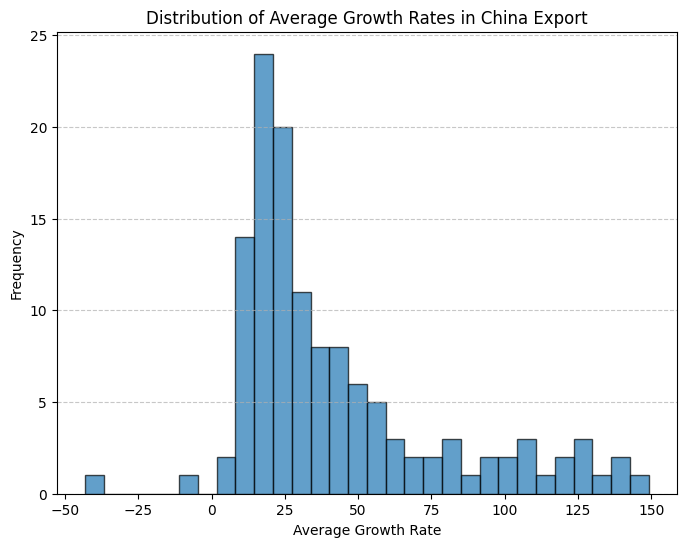

In [107]:
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['china_export1'], bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribution of Average Growth Rates in China Export")
plt.xlabel("Average Growth Rate")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [108]:
df_cleaned.describe()

,china_export1
count,128.000000
mean,42.034907
std,36.042756
min,-43.145070
25%,18.311511
50%,28.440118
75%,53.315833
max,149.125935


In [109]:
name_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia Herzegovina': 'Bosnia and Herzegovina',
    'Brunei Darussalam': 'Brunei',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Dem. Rep. of the Congo': 'Democratic Republic of Congo',
    'Dominican Rep.': 'Dominican Republic',
    'China, Hong Kong SAR': 'Hong Kong',
    'China, Macao SAR': 'Macao',
    "Lao People's Dem. Rep.": 'Laos',
    'Rep. of Korea': 'South Korea',
    'USA': 'United States',
    'Viet Nam': 'Vietnam',
    'Solomon Isds': 'Solomon Islands',
    'Faeroe Isds': 'Faroe Islands',
    'Fmr Sudan': 'Sudan',
    'Neth. Antilles': 'Netherlands Antilles',
    'Other Asia, nes': 'Other Asia, not elsewhere specified',
}
df_cleaned['country'] = df_cleaned['country'].replace(name_mapping)

In [110]:
df_cleaned.to_csv(path_input + '/newchannel/china_export.csv')

In [111]:
df_cleaned['country'].value_counts()

country
Afghanistan      1
Angola           1
South Korea      1
Qatar            1
Portugal         1
                ..
Finland          1
Fiji             1
Faroe Islands    1
Estonia          1
Zambia           1
Name: count, Length: 128, dtype: int64

In [112]:
df_cleaned.describe()

,china_export1
count,128.000000
mean,42.034907
std,36.042756
min,-43.145070
25%,18.311511
50%,28.440118
75%,53.315833
max,149.125935
